# **Import Library**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from collections import defaultdict

from warnings import filterwarnings
filterwarnings('ignore')

# **Glimpse of Data**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving application_train.csv to application_train.csv


In [3]:
app_train = pd.read_csv('application_train.csv')
app_train.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
4620,105405,0,Cash loans,F,Y,Y,0,166500.0,677664.0,34731.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
86651,200564,0,Cash loans,F,Y,Y,2,247500.0,1314117.0,42520.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
186479,316182,0,Cash loans,F,Y,Y,0,99000.0,450000.0,21888.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
127323,247656,0,Cash loans,F,Y,Y,0,180000.0,254700.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
146069,269364,1,Cash loans,M,N,N,0,225000.0,592560.0,30384.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [4]:
app_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

# **Statistic Descriptive**

In [5]:
# separate categorical data
cats = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

In [6]:
app_train.shape

(307511, 122)

In [7]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
app_train.select_dtypes('object').describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [9]:
for column in cats:
    print(app_train[column].value_counts())
    print("-" * 40)

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
----------------------------------------
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
----------------------------------------
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
----------------------------------------
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
----------------------------------------
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
----------------------------------------
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
----------

<i>Most of clients apply for the loan in **weekdays**</i>

## Check The Data

In [10]:
# check duplicate data
app_train.duplicated().any()

False

In [11]:
# Cek Missing Values
cek_null = app_train.isna().sum().sort_values(ascending=False)
percentage = ((app_train.isnull().sum()/len(app_train)*100)).sort_values(ascending=False)
isna_train = pd.concat([cek_null, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values:')
isna_train.head(20)

Count and percentage of missing values:


,Count,Percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


# **Exploratory Data Analysis**

**Distribution of TARGET**

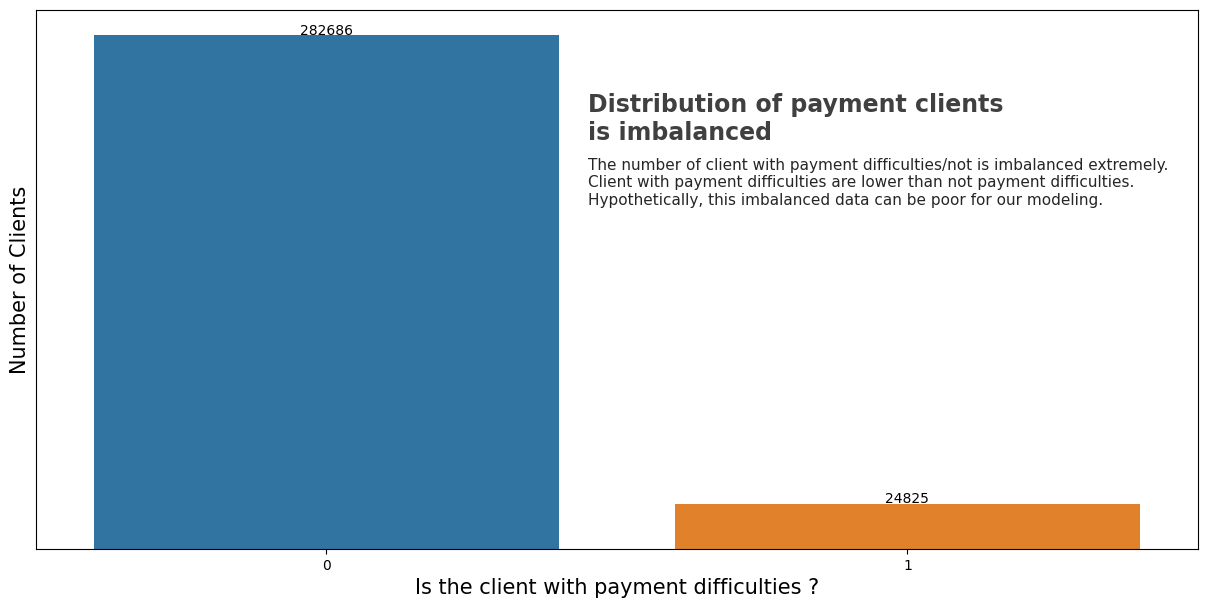

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
g = sns.countplot(data=app_train, x='TARGET')

for p in g.patches:
  height=p.get_height() 
  plt.text(x = p.get_x() + (p.get_width()/2),
    y = height + 300,
    s = '{:.0f}'.format(height),
    ha = 'center'
    )
  
title = """
Distribution of payment clients 
is imbalanced
"""

text = """
The number of client with payment difficulties/not is imbalanced extremely.
Client with payment difficulties are lower than not payment difficulties.
Hypothetically, this imbalanced data can be poor for our modeling.
"""

plt.yticks([])
plt.xlabel('Is the client with payment difficulties ?', fontsize = 15)
plt.ylabel('Number of Clients', fontsize = 15)

plt.text(x = 0.45, y = 210000, s=title,
        fontsize = 17, weight = 'bold', alpha = .75)
plt.text(x = 0.45, y = 180000, s=text,
        fontsize = 11, alpha = .85);

# plt.savefig('Fig/Distributin of target.png')

### **UDFs**

In [13]:
# Plot column and percentages with a TARGET value 1 (clients with payment/loan difficulties are not returned) 
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,9))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [14]:
# Plot distribution of one column
def plot_distribution(column):
  fig = plt.figure(figsize=(14,8))
  sns.distplot(app_train[column], hist=True, kde=True, 
               hist_kws={'edgecolor':'black'},
               kde_kws={'linewidth': 4})
  plt.show()

In [15]:
def plot_distribution_comp(column): 
  no_diff = app_train[app_train['TARGET'] == 0]
  diff = app_train[app_train['TARGET'] == 1]

  plt.figure(figsize=(12,6))
  sns.kdeplot(no_diff[column],label='Return')
  sns.kdeplot(diff[column],label='Not Return')

  plt.legend()
  plt.show()

In [16]:
# # Plot distribution of one column (extract from days to years)
# def plot_distribution_days(column):
#   fig = plt.figure(figsize=(14,8))
#   sns.distplot(app_train[column]/-365, hist=True, kde=True, 
#                hist_kws={'edgecolor':'black'},
#                kde_kws={'linewidth': 4})
#   plt.show()

**<i>Contract Type</i>**

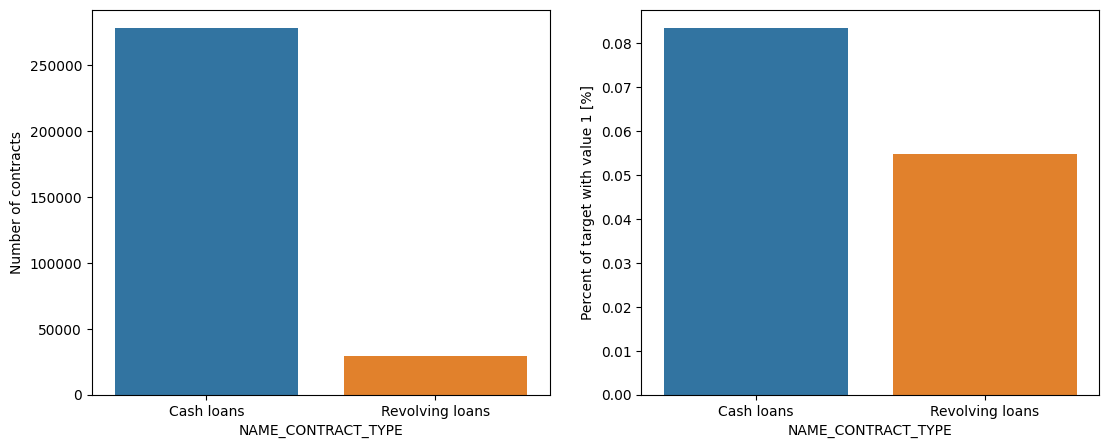

In [17]:
plot_stats('NAME_CONTRACT_TYPE')

Contract type Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

***Clients Gender***

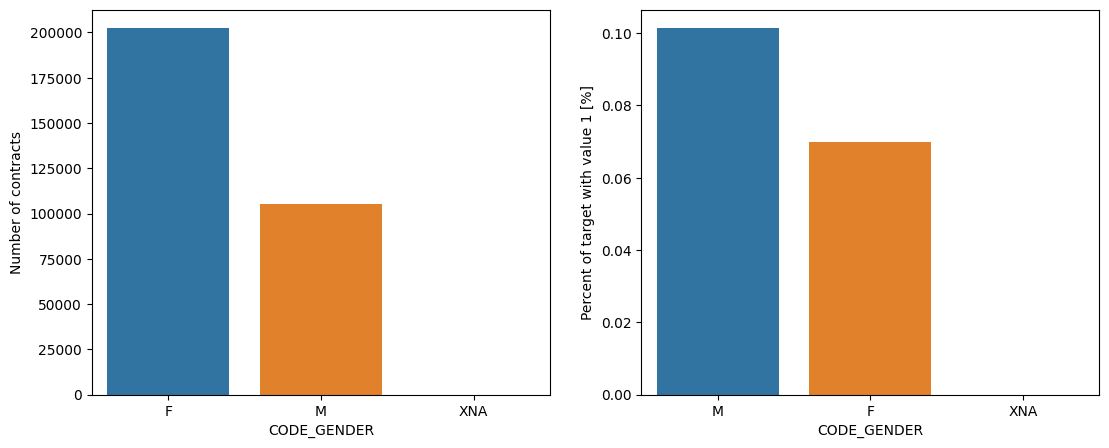

In [18]:
plot_stats('CODE_GENDER')

The number of female clients is almost double the number of male clients. Looking to the percent of defaulted credits, males have a higher chance of not returning their loans (*~10%*), comparing with women (*~7%*).

***Flag own car and flag own realty***

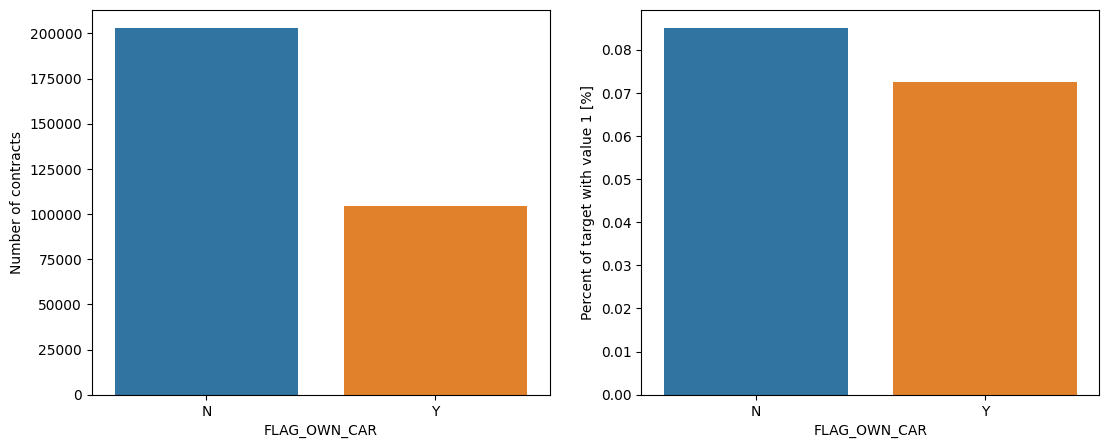

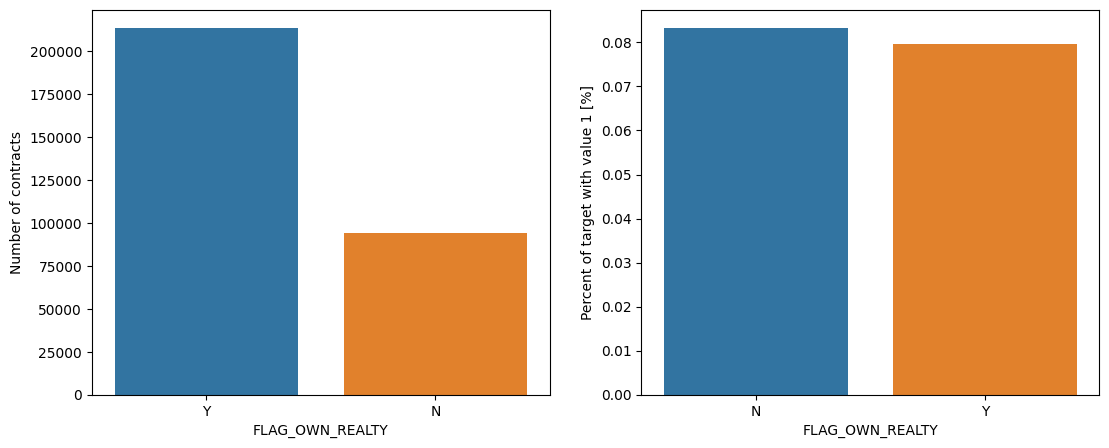

In [19]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

The clients that owns a car are almost a half of the ones that doesn't own one. The clients that owns a car are less likely to not repay a car that the ones that own. Both categories have not-repayment rates around 8%.

The clients that owns real estate are more than double of the ones that doesn't own. Both categories (owning real estate or not owning) have not-repayment rates less than 8%.

**Family Status**

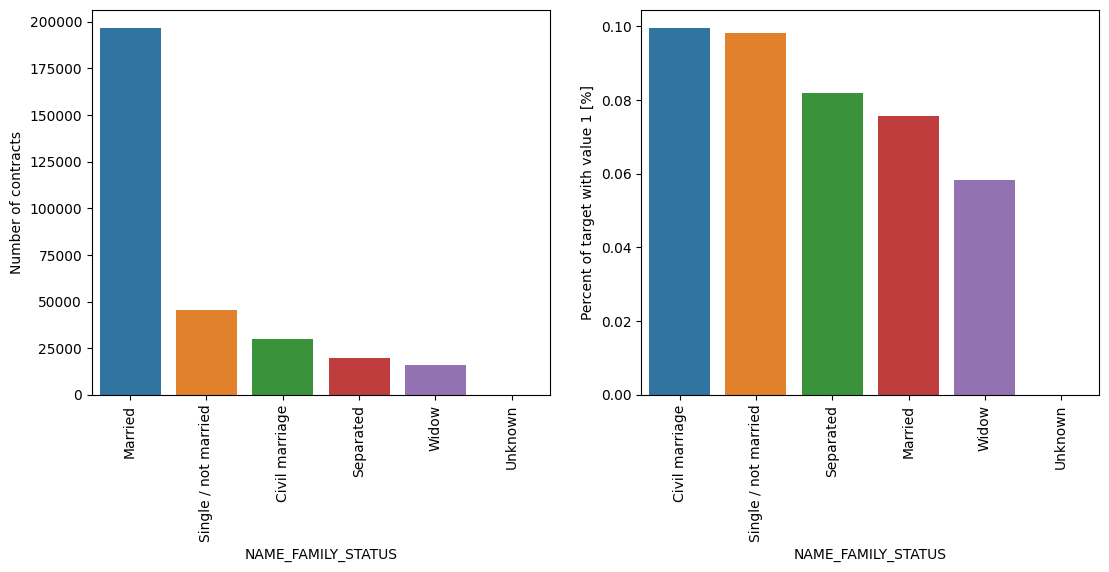

In [20]:
plot_stats('NAME_FAMILY_STATUS',True, True)

Most of clients are married, followed by Single/not married and civil marriage.

In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown).

***Number of Children***

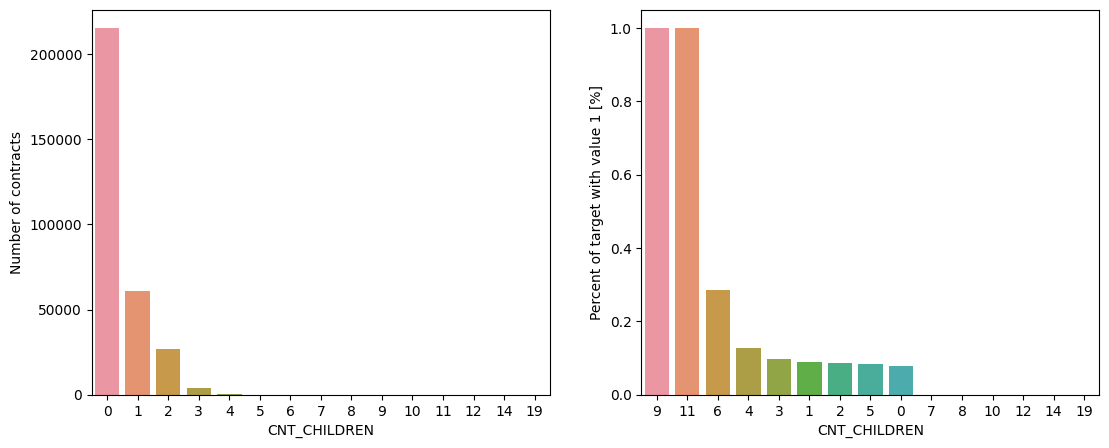

In [21]:
plot_stats('CNT_CHILDREN')

Most of the clients taking a loan have no children. The number of loans associated with the clients with one children are 4 times smaller, the number of loans associated with the clients with two children are 8 times smaller; clients with 3, 4 or more children are much more rare.

As for repayment, clients with no children, 1, 2, 3, and 5 children have percents of no repayment around the average (10%). The clients with 4 and 6 children are above average in terms of percent of not paid back loans (over 25% for families with 6 children).

As for clients with 9 or 11 children, the percent of loans not repaid is 100%.

***Number of Family Members***

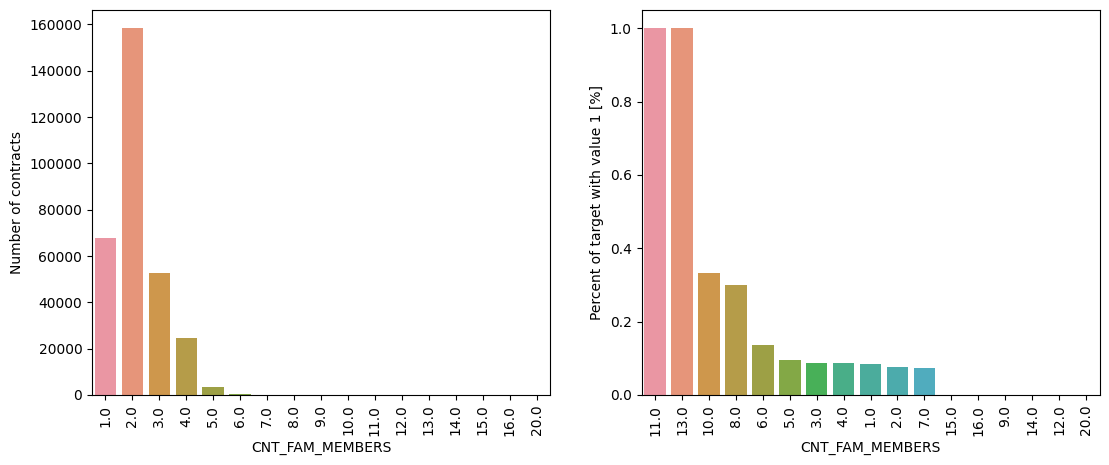

In [22]:
plot_stats('CNT_FAM_MEMBERS',True)

Clients with family members of 2 are most numerous, followed by 1 (single persons), 3 (families with one child) and 4.

Clients with family size of 11 and 13 have 100% not repayment rate. Other families with 10 or 8 members have percents of not repayment of loans over 30%. Families with 6 or less members have repayment rates close to the 10% average.

***Income Type***

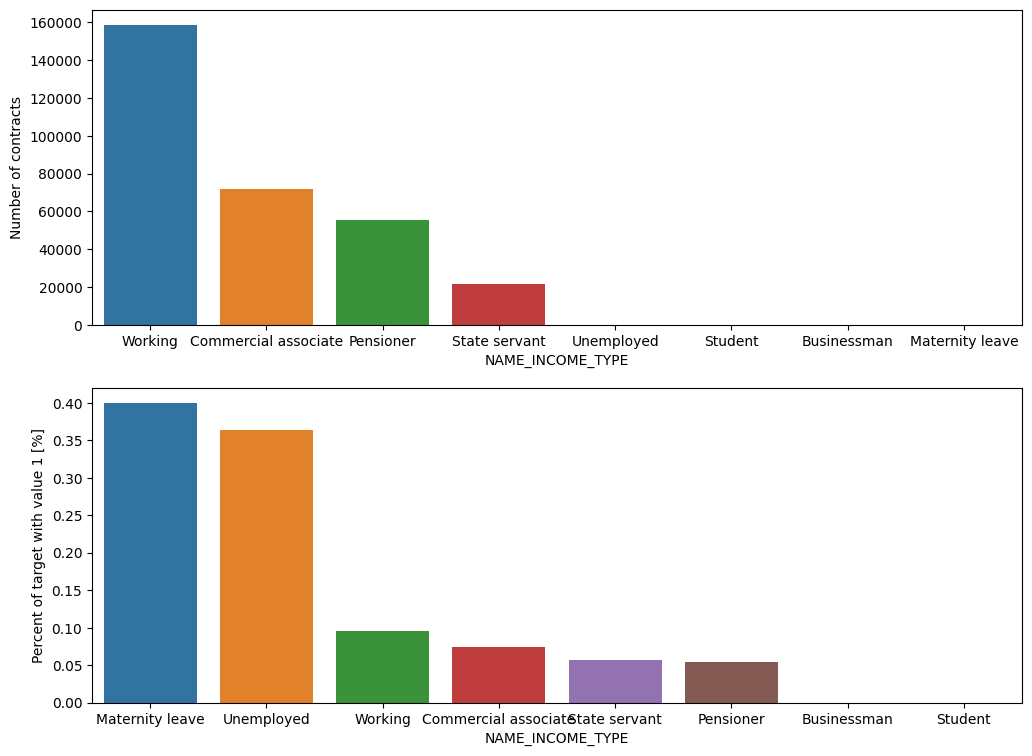

In [23]:
plot_stats('NAME_INCOME_TYPE',False,False)

Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant.

The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.

***Occupation of Client***

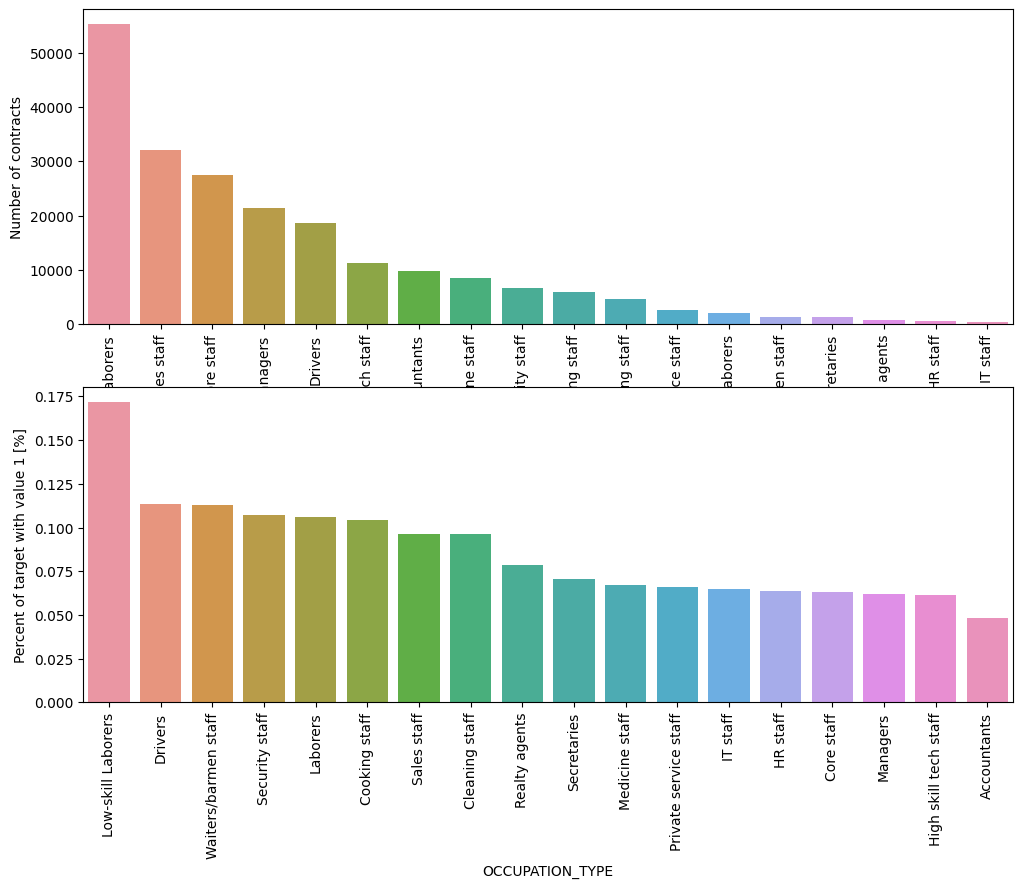

In [24]:
plot_stats('OCCUPATION_TYPE',True, False)

Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.

The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

***Organization Type***

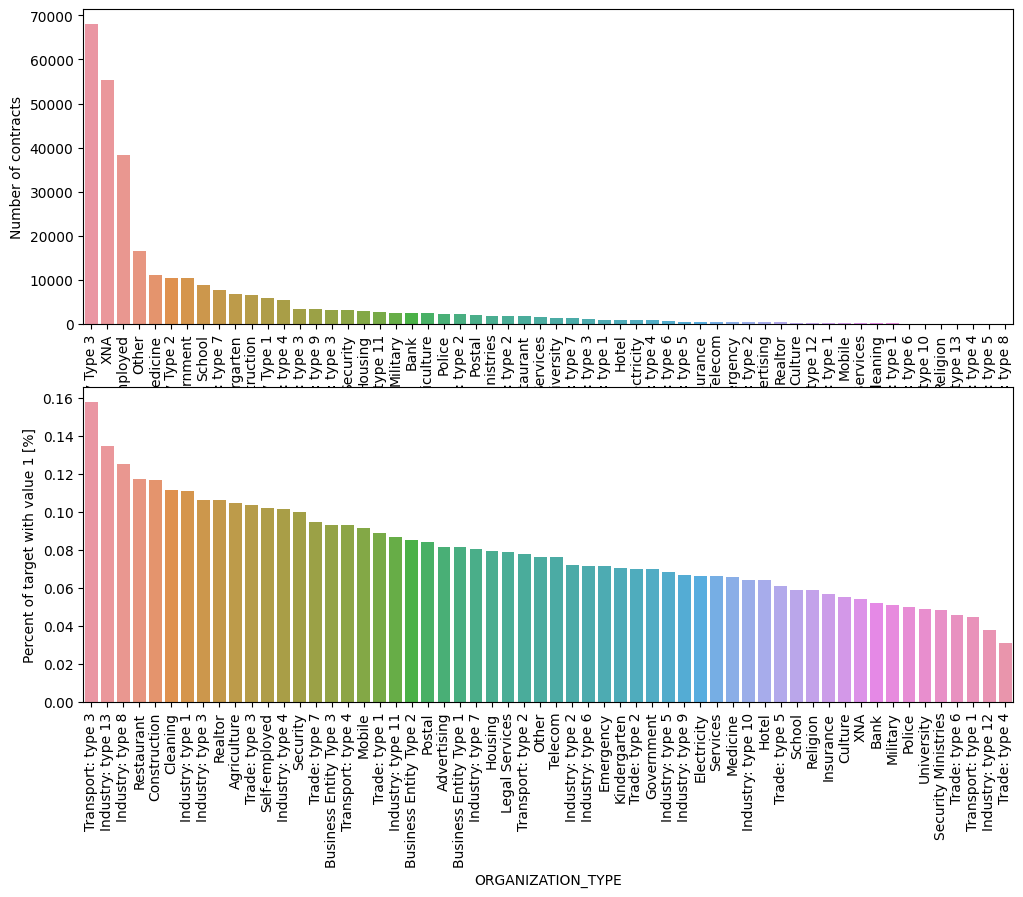

In [25]:
plot_stats('ORGANIZATION_TYPE',True, False)

Oraganizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).

***Education Type***

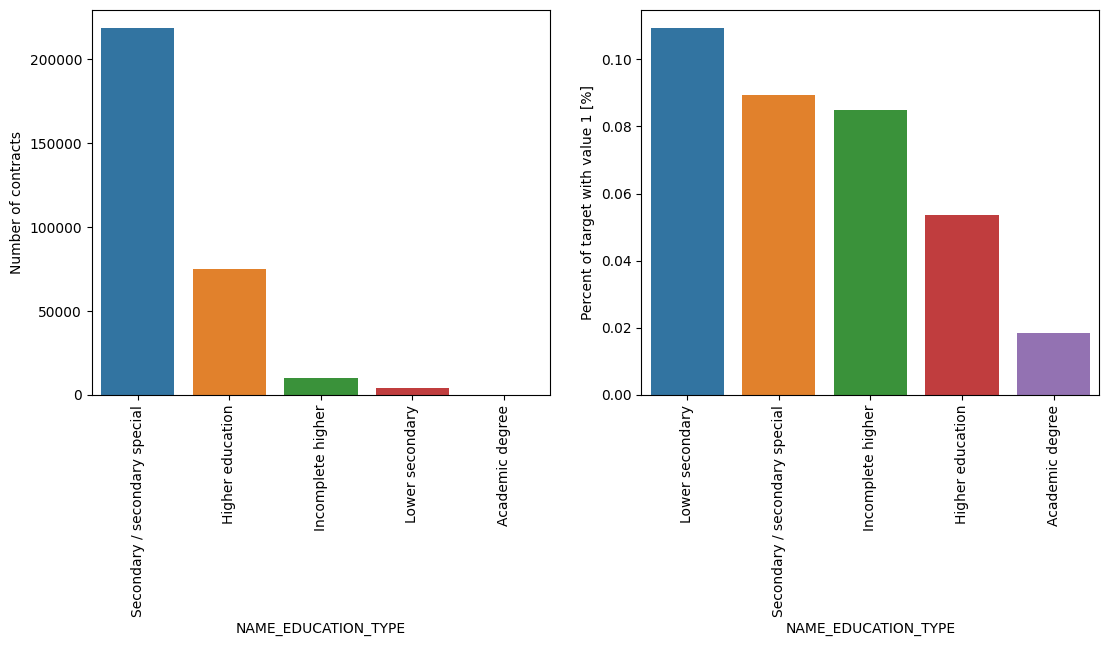

In [26]:
plot_stats('NAME_EDUCATION_TYPE',True)

Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree.

The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% not-repayment rate.

***Housing Type of Client***

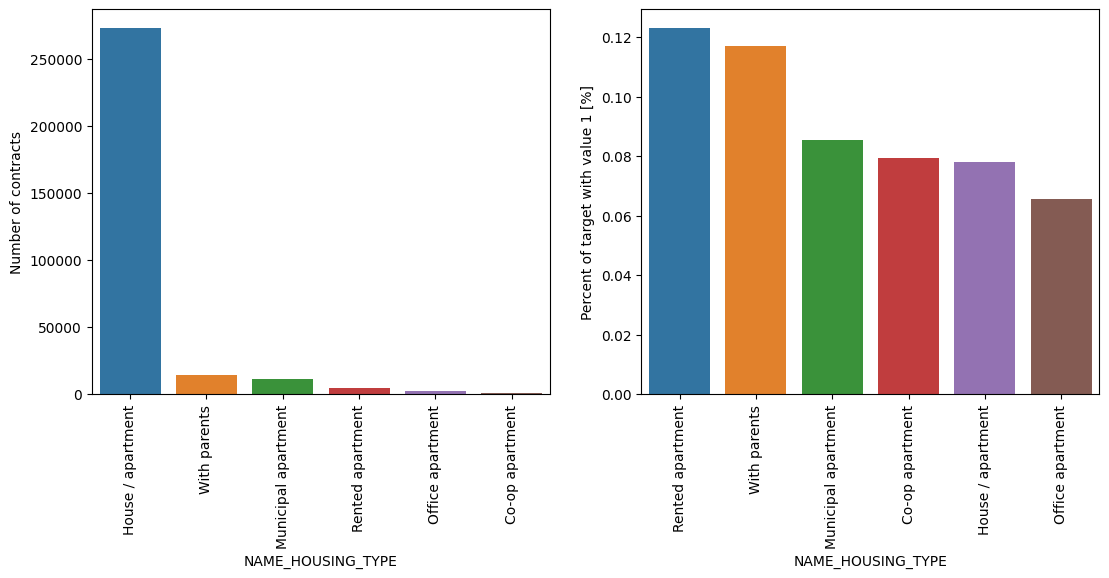

In [27]:
plot_stats('NAME_HOUSING_TYPE',True)

Over 250,000 applicants for credits registered their housing as House/apartment. Following categories have a very small number of clients (With parents, Municipal appartment).

From these categories, Rented apartment and With parents have higher than 10% not-repayment rate.

### **Comparison of interval values with TARGET = 1 and TARGET = 0**

***Distribution of Amount Income Total***

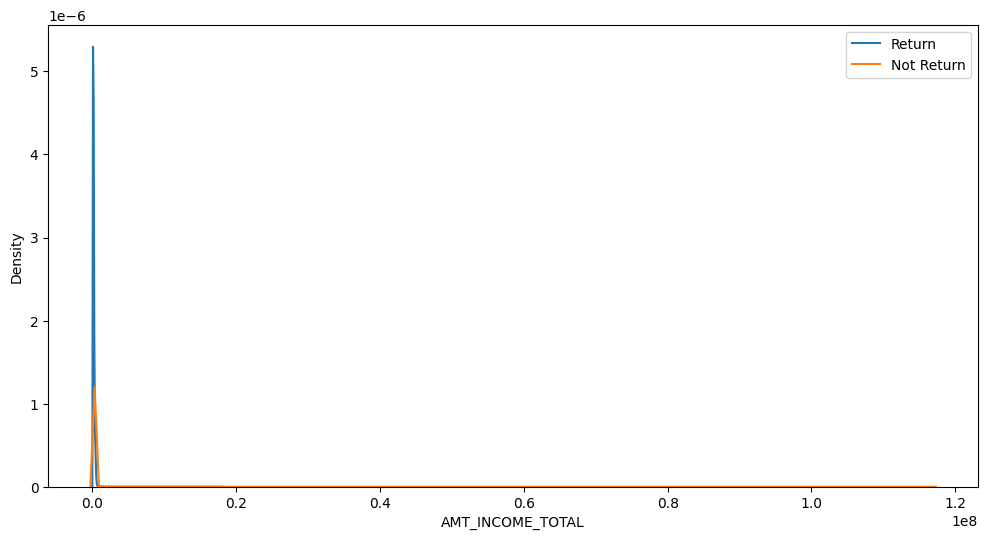

In [28]:
plot_distribution_comp('AMT_INCOME_TOTAL')

***Distribution of Amount Credit***

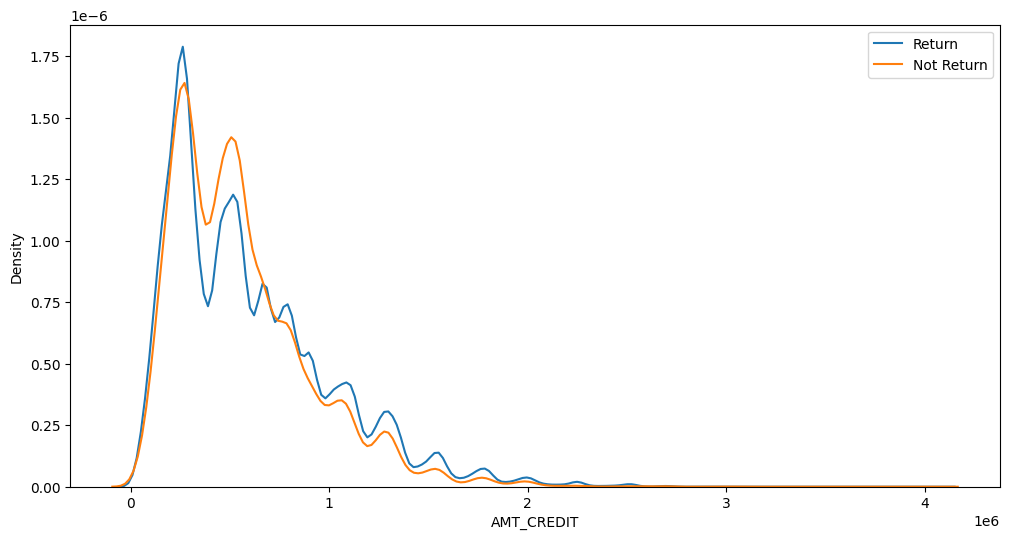

In [29]:
plot_distribution_comp('AMT_CREDIT')

***Distribution of Amount Loan Annuity***

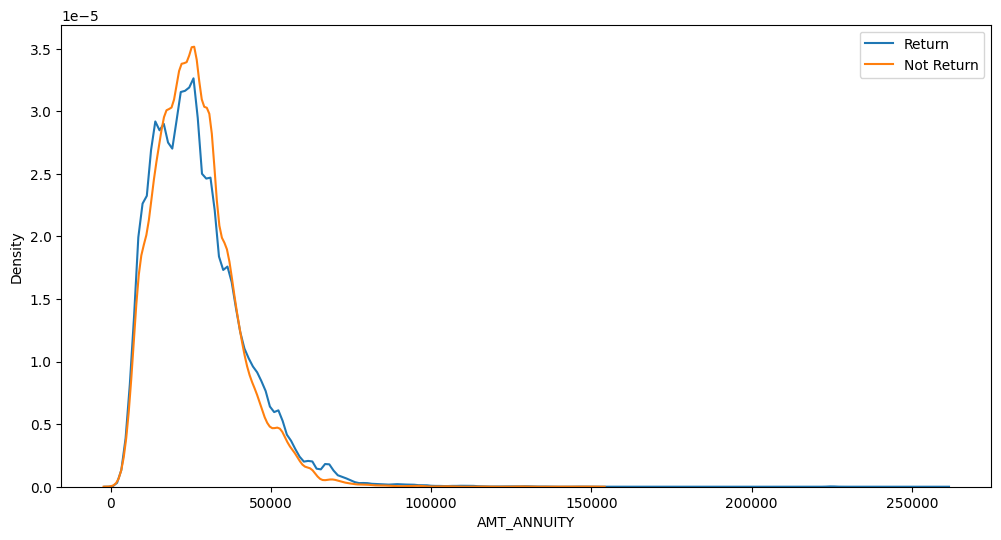

In [30]:
plot_distribution_comp('AMT_ANNUITY')

***Distribution of Amont Goods Price***

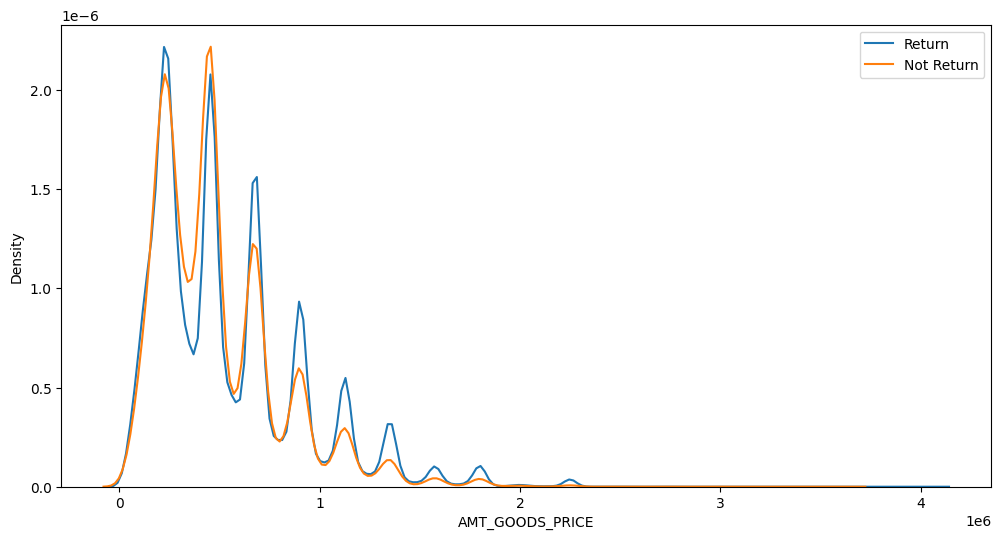

In [31]:
plot_distribution_comp('AMT_GOODS_PRICE')

***Distribution of Client Age***

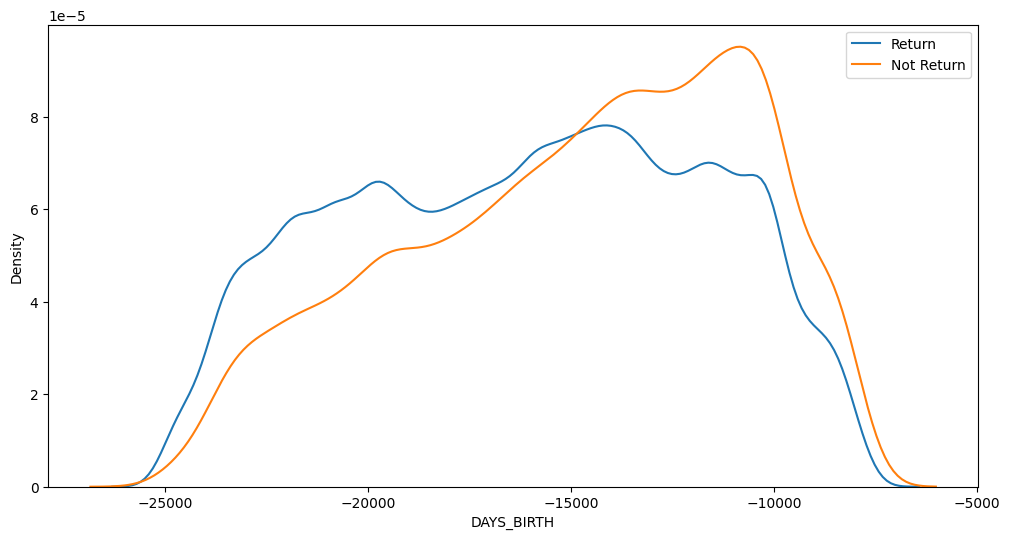

In [32]:
plot_distribution_comp('DAYS_BIRTH')

The negative value means that the date of birth is in the past. The age range is between approximative 20 and 68 years.

***Distribution of Days Employed***

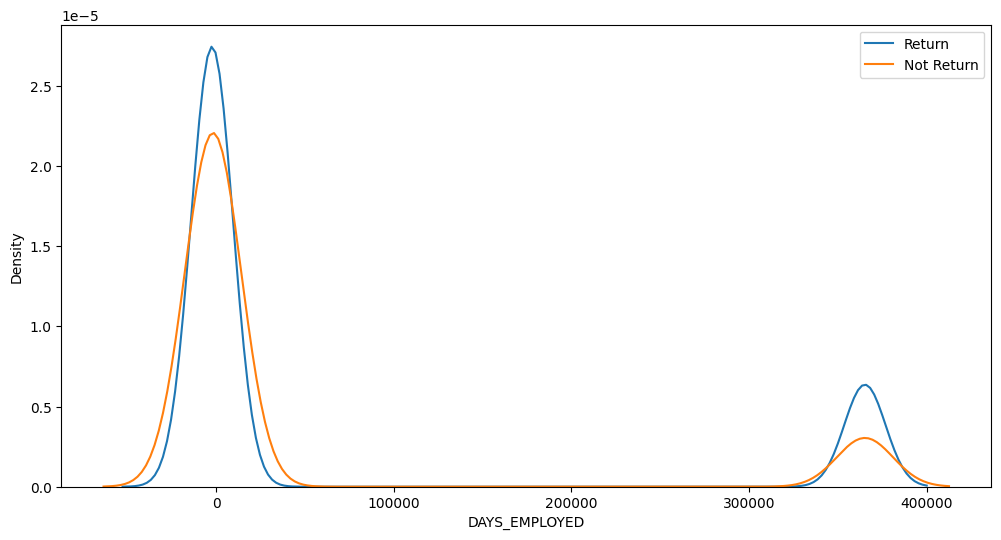

In [33]:
plot_distribution_comp('DAYS_EMPLOYED')

The negative values means Days since employed and most probably these negative values means Unemployed. It is not clear what will be the meaning of the very large numbers at the far end (it is not realistic such a large set of people employed more than 100 years).

***Distribution of Days Registration***

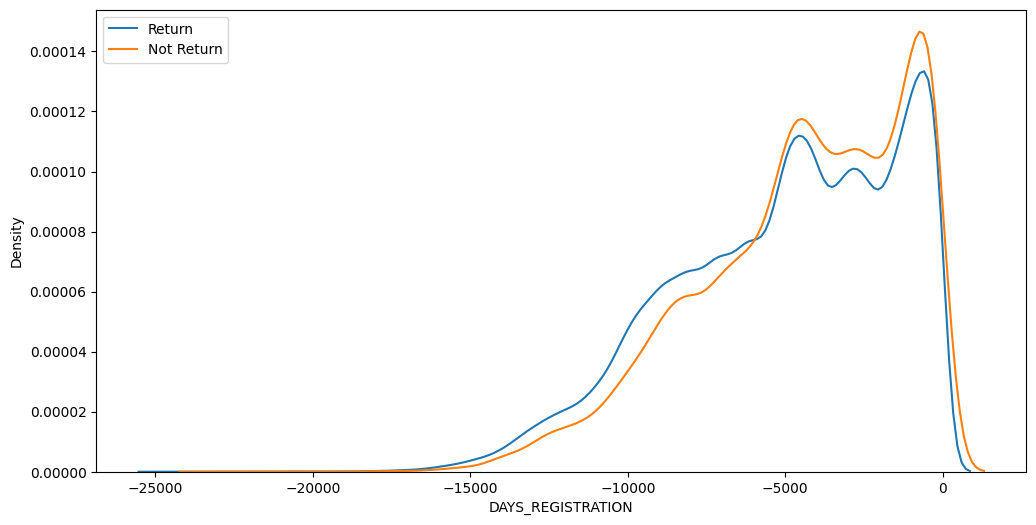

In [34]:
plot_distribution_comp('DAYS_REGISTRATION')

***Distribution of Days ID Publish***

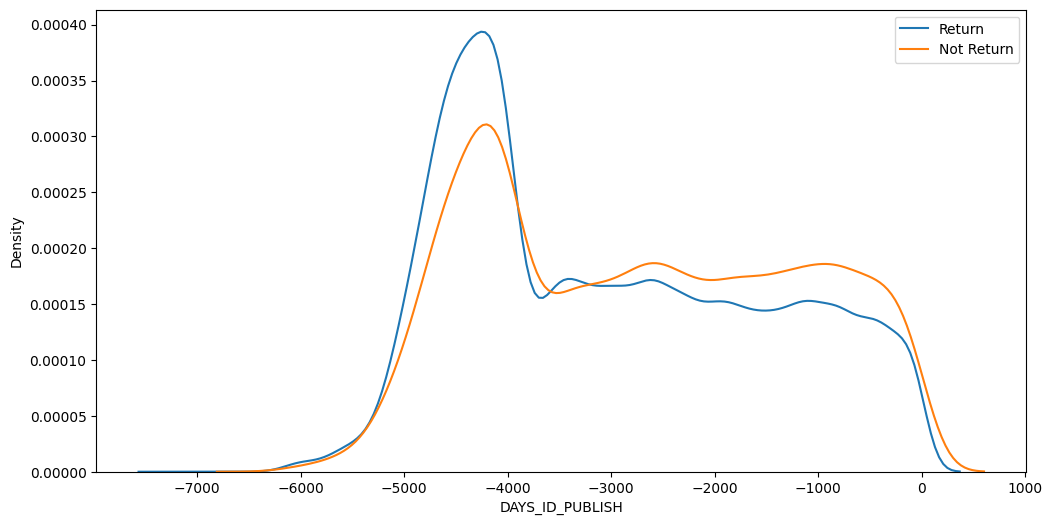

In [35]:
plot_distribution_comp('DAYS_ID_PUBLISH')

***Distribution of EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3***

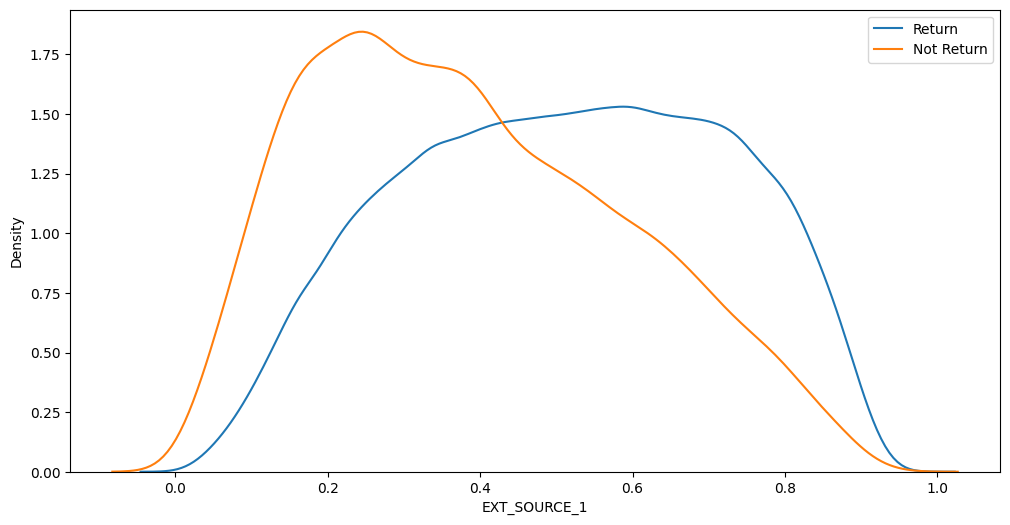

In [36]:
plot_distribution_comp('EXT_SOURCE_1')

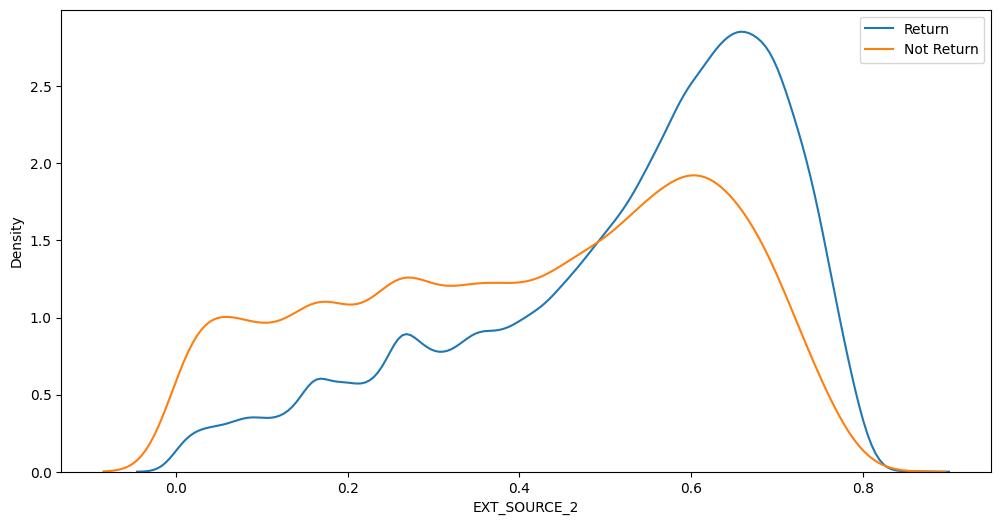

In [37]:
plot_distribution_comp('EXT_SOURCE_2')

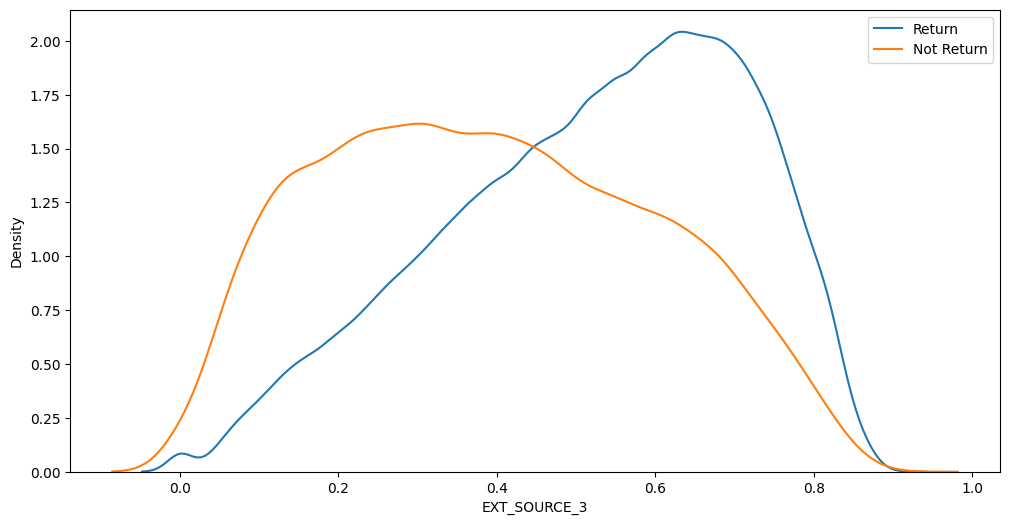

In [38]:
plot_distribution_comp('EXT_SOURCE_3')

### **Region registered not live region and not work region**

*   **REG_REGION_NOT_LIVE_REGION** <br>
    Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
*   **REG_REGION_NOT_WORK_REGION** <br>
    Flag if client's permanent address does not match work address (1=different, 0=same, at region level)



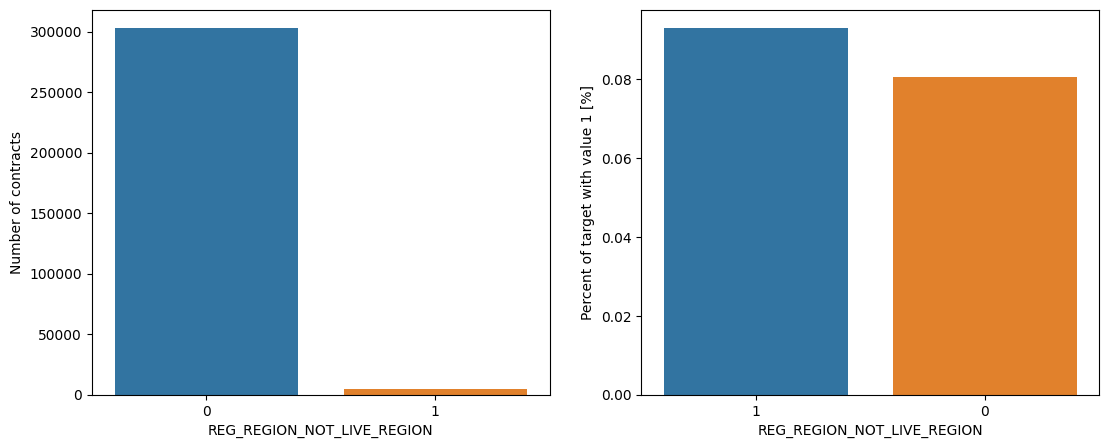

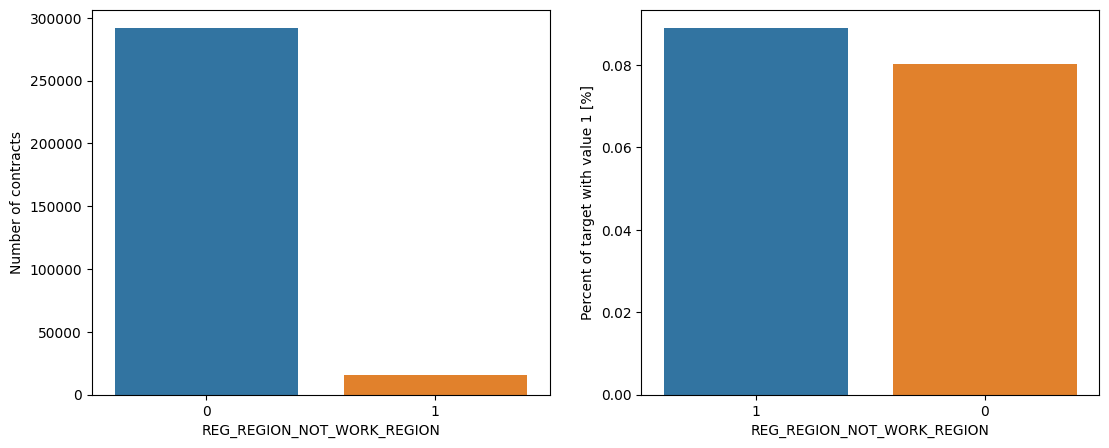

In [39]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

Very few people are registered in not live or not work region. Generally, the rate of not return is slightly larger for these cases than in the rest (slightly above 8% compared with approx. 8%)


### **City registered not live city and not work city**

*   **REG_CITY_NOT_LIVE_CITY**<br>
    Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)
*   **REG_CITY_NOT_WORK_CITY**<br>
    Flag if client's permanent address does not match work address (1=different, 0=same, at city level)

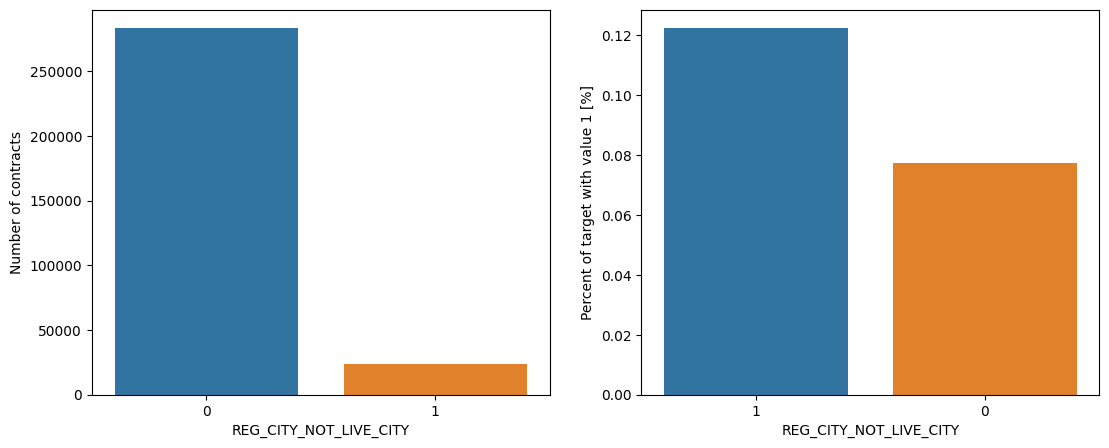

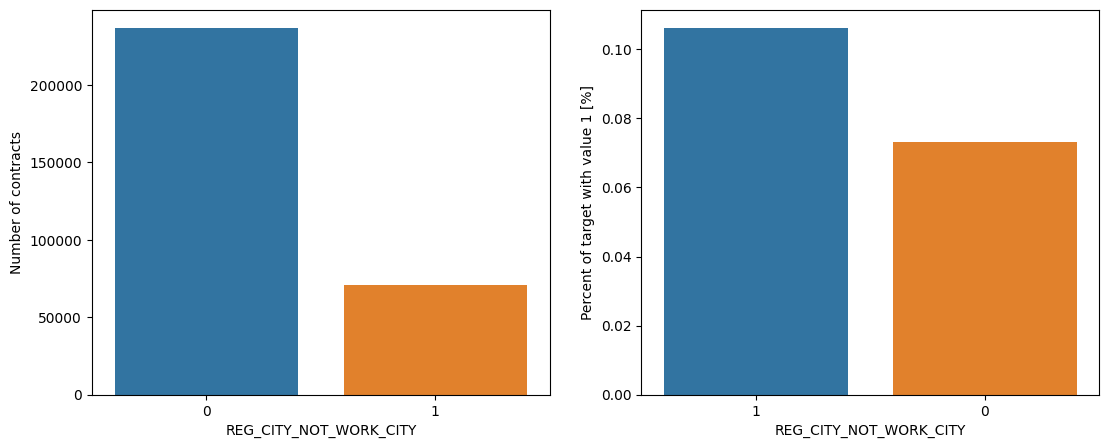

In [40]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

Generally, much more people register in the city they live or work (a larger number register differently in the working city than living city).

The ones that register in different city than the working or living city are more frequently not-repaying the loans than the ones that register same city (work 11% or live 12%).


### **Correlation**

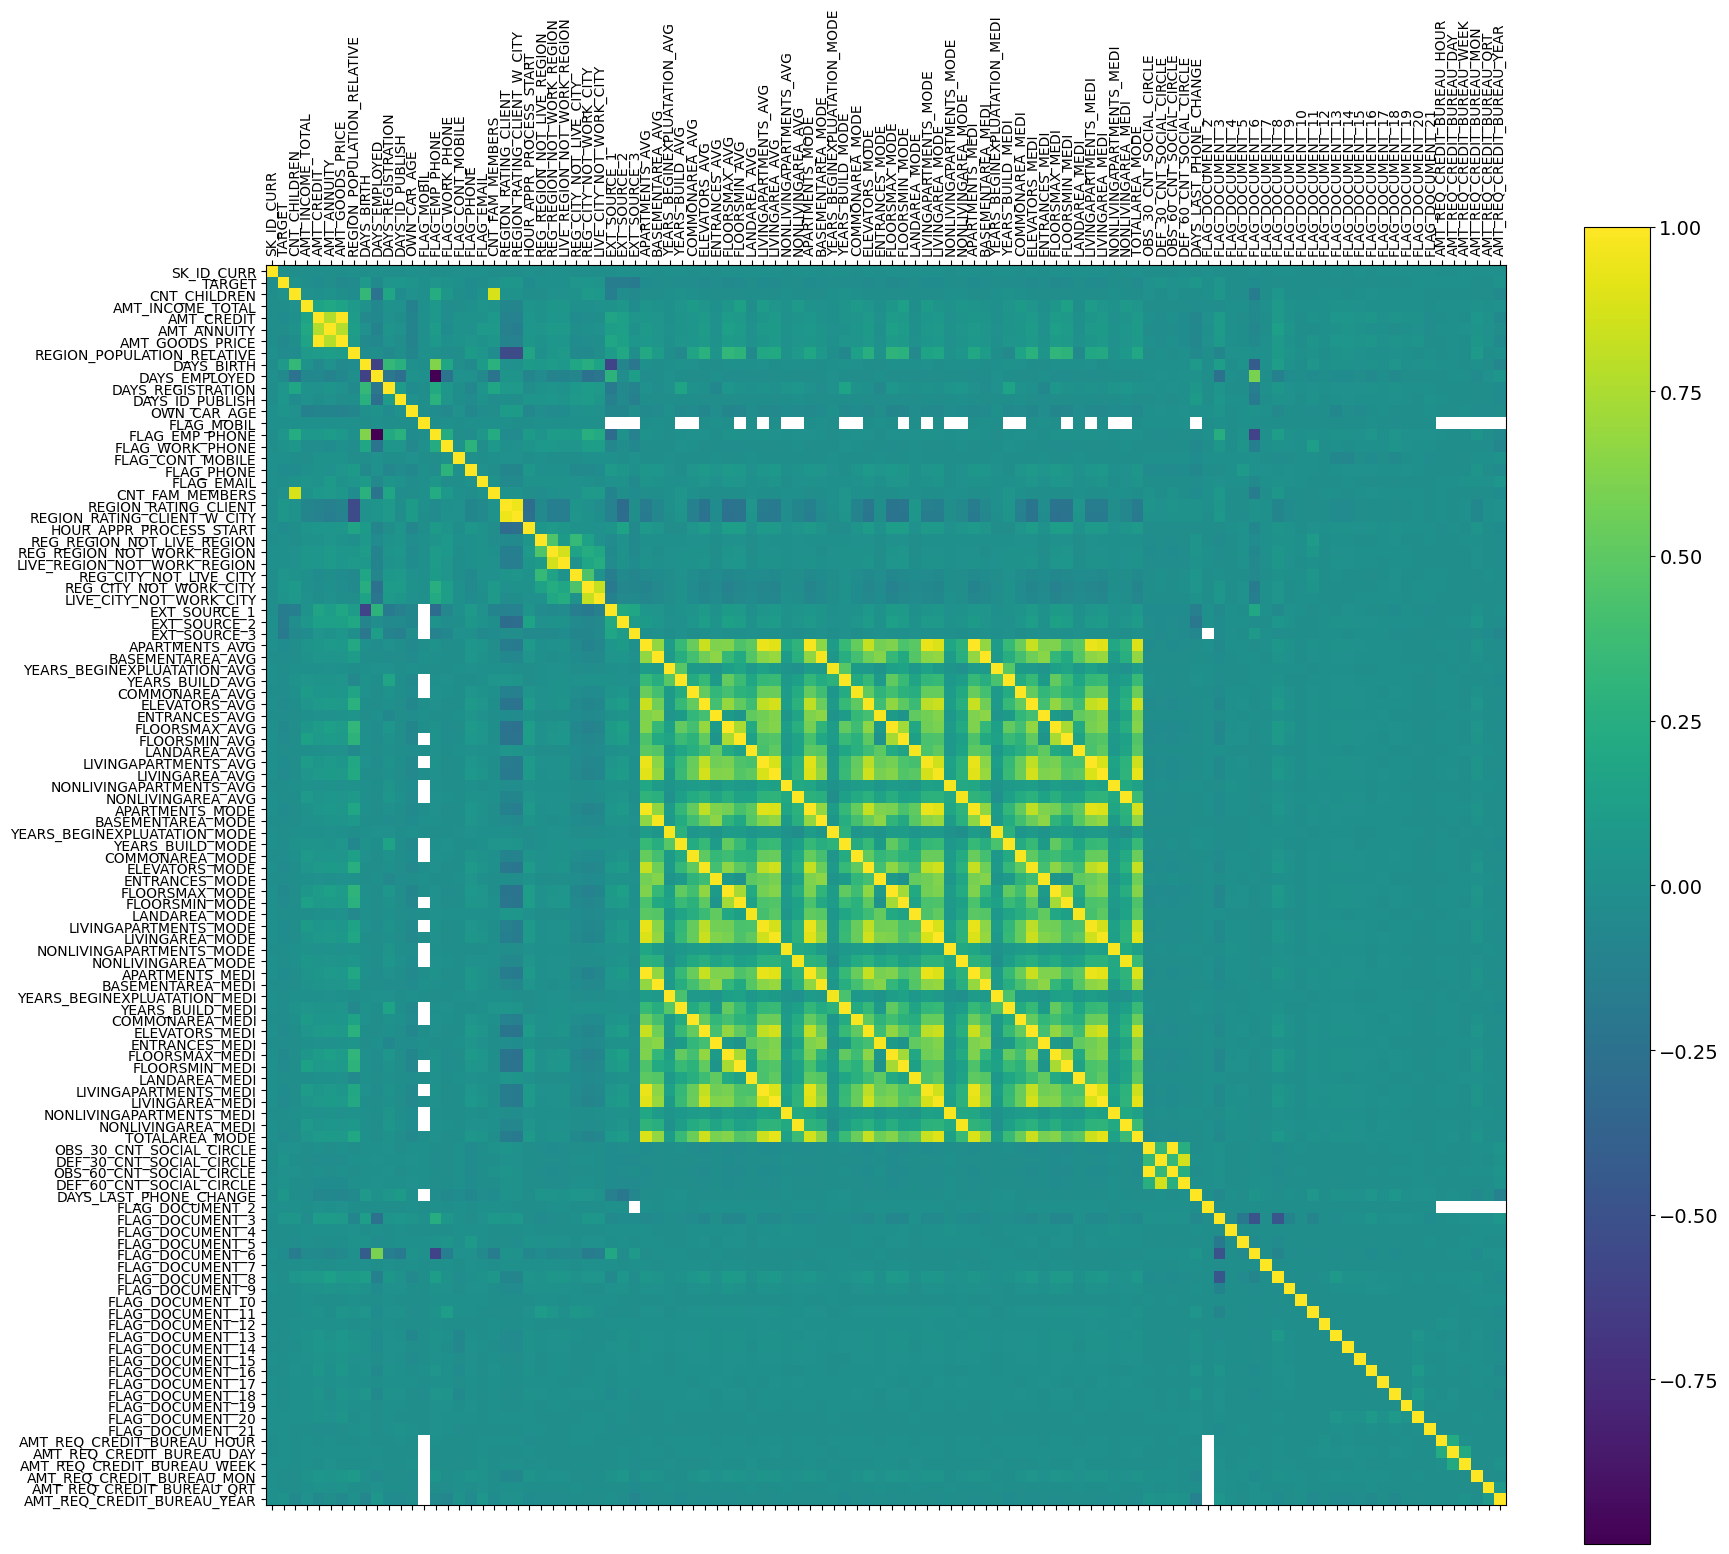

In [41]:
f = plt.figure(figsize=(20, 17))
plt.matshow(app_train.corr(), fignum=f.number)
plt.xticks(range(app_train.select_dtypes(['number']).shape[1]), app_train.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(app_train.select_dtypes(['number']).shape[1]), app_train.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

*   **'CNT_CHILDREN'** and **'CNT_FAM_MEMBERS'** have a high correlation.
*   **'AMT_GOODS_PRICE'** and **'AMT_CREDIT'** are perfectly correlated.
*   **'AMT_GOODS_PRICE'** and **'AMT_ANNUITY'** have a high correlation.
*   **'AMT_ANNUITY'** and **'AMT_CREDIT'** have a high correlation.
*   **'OBS_30_CNT_SOCIAL_CIRCLE'** and **'OBS_60_CNT_SOCIAL_CIRCLE'** are perfectly correlated.
*   **'DEF_30_CNT_SOCIAL_CIRCLE'** and **'DEF_60_CNT_SOCIAL_CIRCLE'** have a high correlation.








# **Pre-processing**

### **Change days to absolute**

In [42]:
app_train['DAYS_BIRTH'] = app_train['DAYS_BIRTH'].abs()
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].abs()
app_train['DAYS_REGISTRATION'] = app_train['DAYS_REGISTRATION'].abs()
app_train['DAYS_ID_PUBLISH'] = app_train['DAYS_ID_PUBLISH'].abs()
app_train['DAYS_LAST_PHONE_CHANGE'] = app_train['DAYS_LAST_PHONE_CHANGE'].abs()

In [43]:
app_train[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0


### **Handling Missing Value**

**Columns with >60% missing values**

In [44]:
missing_value = ['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE',
                 'NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE',
                 'LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI',
                 'FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI','YEARS_BUILD_MEDI',
                 'YEARS_BUILD_MODE','YEARS_BUILD_AVG','OWN_CAR_AGE']

In [45]:
app_train.drop(missing_value, axis=1, inplace=True)

In [46]:
app_train.shape

(307511, 105)

In [47]:
# app_train.columns.values

In [48]:
app_train.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 105, dtype: int64

In [49]:
miss = ['OCCUPATION_TYPE','EXT_SOURCE_1','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG',
        'YEARS_BEGINEXPLUATATION_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','LANDAREA_AVG',
        'LIVINGAREA_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE',
        'ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','LANDAREA_MODE','LIVINGAREA_MODE','NONLIVINGAREA_MODE',
        'APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI',
        'FLOORSMAX_MEDI','LANDAREA_MEDI','LIVINGAREA_MEDI','NONLIVINGAREA_MEDI','HOUSETYPE_MODE','TOTALAREA_MODE',
        'WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
        'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
        'NAME_TYPE_SUITE','DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_2']

In [50]:
train_miss = pd.DataFrame(app_train,columns=miss)

In [51]:
train_miss.head()

,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,...,EMERGENCYSTATE_MODE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2
0,Laborers,0.083037,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,...,No,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,1134.0,0.262949
1,Core staff,0.311267,NaN,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,...,No,0.0,0.0,0.0,0.0,0.0,0.0,Family,828.0,0.622246
2,Laborers,NaN,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,815.0,0.555912
3,Laborers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unaccompanied,617.0,0.650442
4,Core staff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,1106.0,0.322738


In [52]:
train_miss.describe()

,EXT_SOURCE_1,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,...,NONLIVINGAREA_MEDI,TOTALAREA_MODE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2
count,134133.000000,246546.000000,151450.00000,127568.000000,157504.000000,143620.000000,152683.000000,154491.000000,124921.000000,153161.000000,...,137829.000000,159080.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307510.000000,3.068510e+05
mean,0.502130,0.510853,0.11744,0.088442,0.977735,0.078942,0.149725,0.226282,0.066333,0.107399,...,0.028236,0.102547,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,962.858788,5.143927e-01
std,0.211062,0.194844,0.10824,0.082438,0.059223,0.134576,0.100049,0.144641,0.081184,0.110565,...,0.070166,0.107462,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,826.808487,1.910602e-01
min,0.014568,0.000527,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08
25%,0.334007,0.370650,0.05770,0.044200,0.976700,0.000000,0.069000,0.166700,0.018700,0.045300,...,0.000000,0.041200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,274.000000,3.924574e-01
50%,0.505998,0.535276,0.08760,0.076300,0.981600,0.000000,0.137900,0.166700,0.048100,0.074500,...,0.003100,0.068800,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,757.000000,5.659614e-01
75%,0.675053,0.669057,0.14850,0.112200,0.986600,0.120000,0.206900,0.333300,0.085600,0.129900,...,0.026600,0.127600,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1570.000000,6.636171e-01
max,0.962693,0.896010,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,4292.000000,8.549997e-01


In [53]:
train_miss.shape

(307511, 43)

In [54]:
app_train.select_dtypes('number').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'ELEVATORS_MODE', 'EN

In [55]:
train_miss.select_dtypes('number').skew().abs()<1

EXT_SOURCE_1                     True
EXT_SOURCE_3                     True
APARTMENTS_AVG                  False
BASEMENTAREA_AVG                False
YEARS_BEGINEXPLUATATION_AVG     False
ELEVATORS_AVG                   False
ENTRANCES_AVG                   False
FLOORSMAX_AVG                   False
LANDAREA_AVG                    False
LIVINGAREA_AVG                  False
NONLIVINGAREA_AVG               False
APARTMENTS_MODE                 False
BASEMENTAREA_MODE               False
YEARS_BEGINEXPLUATATION_MODE    False
ELEVATORS_MODE                  False
ENTRANCES_MODE                  False
FLOORSMAX_MODE                  False
LANDAREA_MODE                   False
LIVINGAREA_MODE                 False
NONLIVINGAREA_MODE              False
APARTMENTS_MEDI                 False
BASEMENTAREA_MEDI               False
YEARS_BEGINEXPLUATATION_MEDI    False
ELEVATORS_MEDI                  False
ENTRANCES_MEDI                  False
FLOORSMAX_MEDI                  False
LANDAREA_MED

**'EXT_SOURCE_1'**, **'EXT_SOURCE_2'**, **'EXT_SOURCE_3'**, **'DAYS_LAST_PHONE_CHANGE'** are normally distributed, so we will input mean to the missing values. And we will input the median to the leftover features with data type number.

**Numerik Imputation**

In [56]:
# Imputation mean to the features with number data type 
train_miss_mean = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE']

for i in train_miss_mean:
  app_train[i].fillna(app_train[i].mean(), inplace=True)

In [57]:
# Imputation median to the features with number data type
train_miss_med = ['APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','ELEVATORS_AVG', 
                  'ENTRANCES_AVG','FLOORSMAX_AVG','LANDAREA_AVG','LIVINGAREA_AVG','NONLIVINGAREA_AVG',
                  'APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','ELEVATORS_MODE',
                  'ENTRANCES_MODE','FLOORSMAX_MODE','LANDAREA_MODE','LIVINGAREA_MODE','NONLIVINGAREA_MODE',
                  'APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','ELEVATORS_MEDI',
                  'ENTRANCES_MEDI','FLOORSMAX_MEDI','LANDAREA_MEDI','LIVINGAREA_MEDI','NONLIVINGAREA_MEDI',
                  'TOTALAREA_MODE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                  'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
                  'AMT_REQ_CREDIT_BUREAU_YEAR','DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']

for i in train_miss_med:
  app_train[i].fillna(app_train[i].median(), inplace=True)

**Categorical Imputation**

In [58]:
train_miss.select_dtypes('object').columns

Index(['OCCUPATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'NAME_TYPE_SUITE'],
      dtype='object')

In [59]:
# Imputation mode
train_miss_mode = ['HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']

for i in train_miss_mode:
    app_train[i].fillna(app_train[i].mode()[0],inplace=True)

In [60]:
# imputation OCCUPATION_TYPE column 
app_train['OCCUPATION_TYPE'] = app_train['OCCUPATION_TYPE'].fillna('Others')
# imputation NAME_TYPE_SUITE column
app_train['NAME_TYPE_SUITE'] = app_train['NAME_TYPE_SUITE'].fillna('Unknown')

In [61]:
app_train['OCCUPATION_TYPE'].value_counts()

Others                   96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [62]:
app_train['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Unknown              1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

### **Handling Invalid Value**

There are 'XNA' variabels in columns CODE_GENDER and ORGANIZATION_TYPE. Therefore we replace it with 'Other'

In [63]:
app_train['CODE_GENDER'].replace('XNA', 'Other', inplace=True)
app_train['ORGANIZATION_TYPE'].replace('XNA', 'Other', inplace=True)



'CNT_CHILDREN' and 'CNT_FAM_MEMBERS' have a high correlation.

'AMT_GOODS_PRICE' and 'AMT_CREDIT' are perfectly correlated.

'AMT_GOODS_PRICE' and 'AMT_ANNUITY' have a high correlation.

'AMT_ANNUITY' and 'AMT_CREDIT' have a high correlation.

'OBS_30_CNT_SOCIAL_CIRCLE' and 'OBS_60_CNT_SOCIAL_CIRCLE' are perfectly correlated.

'DEF_30_CNT_SOCIAL_CIRCLE' and 'DEF_60_CNT_SOCIAL_CIRCLE' have a high correlation.

We decide to erase one of each pairs (we choose to delete the correlation to 'TARGET' that is closer to 0, except 'AMT_GOODS_PRICE' and 'AMT_ANNUITY'


In [64]:
train_close = ['CNT_FAM_MEMBERS', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 
               'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']

In [65]:
train = app_train.drop(train_close, axis=1)

In [66]:
# After drop missing values
cek_null = train.isna().sum().sort_values(ascending=False)
percentage = ((train.isnull().sum()/len(train)*100)).sort_values(ascending=False)
isna_train = pd.concat([cek_null, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values:')
isna_train

Count and percentage of missing values:


,Count,Percentage
SK_ID_CURR,0,0.0
FLOORSMAX_MEDI,0,0.0
DAYS_LAST_PHONE_CHANGE,0,0.0
DEF_60_CNT_SOCIAL_CIRCLE,0,0.0
OBS_30_CNT_SOCIAL_CIRCLE,0,0.0
...,...,...
REG_REGION_NOT_LIVE_REGION,0,0.0
HOUR_APPR_PROCESS_START,0,0.0
WEEKDAY_APPR_PROCESS_START,0,0.0
REGION_RATING_CLIENT_W_CITY,0,0.0


In [67]:
train.shape

(307511, 100)

### **Feature Encoding**

In [68]:
cats = train.select_dtypes('object')

In [69]:
cats.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [79]:
from sklearn.preprocessing import LabelEncoder

clm_le = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

for col in clm_le:
  le = LabelEncoder()
  le.fit(train[col])
  train[col] = le.transform(train[col])

In [80]:
train.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
201362,333405,0,0,0,1,0,0,157500.0,675000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
274424,418091,0,0,0,0,1,1,157500.0,889515.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
297772,444977,0,0,0,1,1,0,139500.0,254700.0,2,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
270239,413199,1,0,0,0,0,0,234000.0,566055.0,6,...,0,0,0,0,0.0,0.0,0.0,4.0,0.0,2.0
246191,384930,0,0,1,1,1,0,450000.0,738486.0,6,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0


In [81]:
X = train.drop(['TARGET','SK_ID_CURR'],1)
y = train['TARGET']

In [82]:
y.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

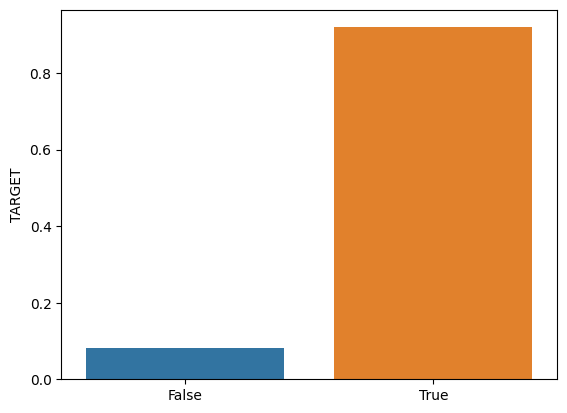

In [83]:
sns.barplot(x = [True,False],y = y.value_counts(normalize=True))
plt.show()

### **Feature Selection (ANOVA)**

In [85]:
X.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
  

In [86]:
feats = X.columns

In [88]:
from sklearn.feature_selection import f_classif

anova = pd.DataFrame(f_classif(X,y)).transpose()

In [89]:
anova.columns = ['f-score','p-value']

In [90]:
anova['columns_name'] = feats

In [91]:
# The sequence of important features can be seen from the largest to the smallest f-score
anova.sort_values('f-score',ascending=False).head(30)

,f-score,p-value,columns_name
36,8110.506235,0.000000e+00,EXT_SOURCE_2
37,7811.655339,0.000000e+00,EXT_SOURCE_3
35,3053.204671,0.000000e+00,EXT_SOURCE_1
13,1893.976087,0.000000e+00,DAYS_BIRTH
25,1144.461405,2.078455e-250,REGION_RATING_CLIENT_W_CITY
24,1070.491250,2.172433e-234,REGION_RATING_CLIENT
71,940.487178,3.183720e-206,DAYS_LAST_PHONE_CHANGE
9,922.808544,2.159263e-202,NAME_EDUCATION_TYPE
1,922.594003,2.403275e-202,CODE_GENDER
16,816.396507,2.527524e-179,DAYS_ID_PUBLISH


In [92]:
# Chosen Features (30 highest f-score)
chosen_feats = ['EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_1','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY',
                'REGION_RATING_CLIENT','DAYS_LAST_PHONE_CHANGE','NAME_EDUCATION_TYPE','CODE_GENDER',
                'DAYS_ID_PUBLISH','REG_CITY_NOT_WORK_CITY','DAYS_EMPLOYED','NAME_INCOME_TYPE','FLAG_EMP_PHONE',
                'REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3','DAYS_REGISTRATION','FLOORSMAX_AVG','FLOORSMAX_MEDI',
                'FLOORSMAX_MODE','REGION_POPULATION_RELATIVE','ELEVATORS_AVG','ELEVATORS_MEDI','NAME_HOUSING_TYPE',
                'ELEVATORS_MODE','LIVE_CITY_NOT_WORK_CITY','DEF_60_CNT_SOCIAL_CIRCLE','NAME_CONTRACT_TYPE',
                'AMT_CREDIT','TOTALAREA_MODE']

In [93]:
X = pd.DataFrame(train,columns=chosen_feats)

X

,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_ID_PUBLISH,...,REGION_POPULATION_RELATIVE,ELEVATORS_AVG,ELEVATORS_MEDI,NAME_HOUSING_TYPE,ELEVATORS_MODE,LIVE_CITY_NOT_WORK_CITY,DEF_60_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE,AMT_CREDIT,TOTALAREA_MODE
0,0.262949,0.139376,0.083037,9461,2,2,1134.0,4,1,2120,...,0.018801,0.00,0.00,1,0.0000,0,2.0,0,406597.5,0.0149
1,0.622246,0.510853,0.311267,16765,1,1,828.0,1,0,291,...,0.003541,0.08,0.08,1,0.0806,0,0.0,0,1293502.5,0.0714
2,0.555912,0.729567,0.502130,19046,2,2,815.0,4,1,2531,...,0.010032,0.00,0.00,1,0.0000,0,0.0,1,135000.0,0.0688
3,0.650442,0.510853,0.502130,19005,2,2,617.0,4,0,2437,...,0.008019,0.00,0.00,1,0.0000,0,0.0,0,312682.5,0.0688
4,0.322738,0.510853,0.502130,19932,2,2,1106.0,4,1,3458,...,0.028663,0.00,0.00,1,0.0000,1,0.0,0,513000.0,0.0688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.681632,0.510853,0.145570,9327,1,1,273.0,4,1,1982,...,0.032561,0.22,0.22,5,0.0806,0,0.0,0,254700.0,0.2898
307507,0.115992,0.510853,0.502130,20775,2,2,0.0,4,0,4090,...,0.025164,0.00,0.00,1,0.0000,0,0.0,0,269550.0,0.0214
307508,0.535722,0.218859,0.744026,14966,3,3,1909.0,1,0,5150,...,0.005002,0.00,0.00,1,0.0000,1,0.0,0,677664.0,0.7970
307509,0.514163,0.661024,0.502130,11961,2,2,322.0,4,0,931,...,0.005313,0.00,0.00,1,0.0000,0,0.0,0,370107.0,0.0086


### **Train Test Split**

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 123)

In [97]:
print('Dimensi Train:',X_train.shape)
print('Dimensi Test:',X_test.shape)

Dimensi Train: (215257, 30)
Dimensi Test: (92254, 30)


### **Handling Imbalance (SMOTE)**

In [96]:
from imblearn import over_sampling, under_sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE

X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(random_state=44).fit_resample(X_train, y_train)

In [114]:
print('Dimensi X_over_SMOTE:',X_over_SMOTE.shape)
print('Dimensi y_over_SMOTE:',y_over_SMOTE.shape)

Dimensi X_over_SMOTE: (395760, 30)
Dimensi y_over_SMOTE: (395760,)


In [100]:
y_over_SMOTE.value_counts()

0    197880
1    197880
Name: TARGET, dtype: int64

### **Normalization**

In [103]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X_over_SMOTE)
X_transform = pd.DataFrame(X_transform,columns = X.columns)

In [104]:
X_transform

,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_ID_PUBLISH,...,REGION_POPULATION_RELATIVE,ELEVATORS_AVG,ELEVATORS_MEDI,NAME_HOUSING_TYPE,ELEVATORS_MODE,LIVE_CITY_NOT_WORK_CITY,DEF_60_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE,AMT_CREDIT,TOTALAREA_MODE
0,0.344754,0.569889,0.514238,0.431680,0.0,0.0,0.000000,1.00,0.5,0.137557,...,0.157398,0.0000,0.0000,0.2,0.000000,0.0,0.000000,0.0,0.207694,0.068800
1,0.748203,0.723018,0.514238,0.871364,0.5,0.5,0.537157,1.00,0.5,0.430457,...,0.257000,0.0000,0.0000,0.2,0.000000,0.0,0.000000,0.0,0.110022,0.068800
2,0.556163,0.569889,0.514238,0.100507,0.5,0.5,0.437754,1.00,0.5,0.177713,...,0.125232,0.1600,0.1600,1.0,0.161100,0.0,0.000000,0.0,0.067191,0.166000
3,0.356261,0.548903,0.611132,0.282976,0.5,0.5,0.806691,1.00,0.0,0.573989,...,0.429796,0.0000,0.0000,0.2,0.000000,0.0,0.041667,0.0,0.257500,0.028400
4,0.812591,0.329493,0.514238,0.778241,0.5,0.5,0.000000,1.00,0.0,0.656662,...,0.138276,0.0000,0.0000,0.2,0.000000,0.0,0.000000,0.0,0.052119,0.060400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395755,0.690218,0.023615,0.514238,0.141375,0.5,0.5,0.040291,0.25,0.0,0.348201,...,0.232697,0.0000,0.0000,0.2,0.000000,0.0,0.000000,0.0,0.067416,0.074285
395756,0.721718,0.606928,0.514238,0.289177,0.5,0.5,0.080848,1.00,0.5,0.609698,...,0.159099,0.0812,0.0812,0.2,0.081758,0.0,0.000000,0.0,0.052360,0.096966
395757,0.727549,0.599498,0.613464,0.823788,0.5,0.5,0.271122,1.00,0.0,0.594275,...,0.292509,0.0000,0.0000,0.2,0.000000,0.0,0.000000,0.0,0.118707,0.077592
395758,0.641372,0.712156,0.357787,0.280722,0.5,0.5,0.066397,1.00,0.0,0.545922,...,0.273889,0.0000,0.0000,0.2,0.000000,0.0,0.000000,0.0,0.059775,0.011933


# **Modeling**

In [110]:
# X_train = X_transform.copy()

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [136]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [137]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

def eval_clf_SMOTE(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_transform)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_transform)
    
    cls_report_smote_train = classification_report(y_over_SMOTE, y_pred_train)
    print(f"Classification Report (Train) : \n {cls_report_smote_train}")
    cls_report_smote_test = classification_report(y_test, y_pred)
    print(f"Classification Report (Test) : \n {cls_report_smote_test}")

    acc_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    roc_auc_train = roc_auc_score(y_over_SMOTE, y_pred_proba_train[:, 1])
    roc_auc_test = roc_auc_score(y_test, y_pred_proba[:, 1])
    
#     print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
#     print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
#     print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
#     print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
#     print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    roc_auc_crossval_train = round(score['train_score'].mean(), 4)
    roc_auc_crossval_test = round(score['test_score'].mean(), 4)
    # print('roc_auc (crossval train): '+ str(round(score['train_score'].mean(), 4)))
    # print('roc_auc (crossval test): '+ str(round(score['test_score'].mean(), 4)))
    
    eval_result = {
        'Test Accuracy': acc_test,
        'Test Precision': precision_test,
        'Test Recall': recall_test,
        'Test F1': f1_test,
        'Train ROC AUC': roc_auc_train,
        'Test ROC AUC': roc_auc_test,
        'Crossval Train ROC AUC': roc_auc_crossval_train,
        'Crossval Test ROC AUC': roc_auc_crossval_test
    }
    return eval_result

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    print(model.best_estimator_.get_params())

In [142]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier', 'GradientBoostingClassifier']
algorithms = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier]

# Result List
acc_test = []
precision_test = []
recall_test = []
f1_test = []
roc_auc_train = []
roc_auc_test = []
roc_auc_crossval_train = []
roc_auc_crossval_test = []

In [143]:
### Model Evaluation using SMOTE Data
i = 0

for model_type in algorithms:
    # Fitting and using the algorithms
    model = model_type()
    model.fit(X_transform, y_over_SMOTE)
    print(models[i])
    result = eval_clf_SMOTE(model)
    
    # Adding the results to the list
    acc_test.append(result['Test Accuracy'])
    precision_test.append(result['Test Precision'])
    recall_test.append(result['Test Recall'])
    f1_test.append(result['Test F1'])
    roc_auc_train.append(result['Train ROC AUC'])
    roc_auc_test.append(result['Test ROC AUC'])
    roc_auc_crossval_train.append(result['Crossval Train ROC AUC'])
    roc_auc_crossval_test.append(result['Crossval Test ROC AUC'])
    
    i += 1

Logistic Regression
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       0.74      0.74      0.74    197880
           1       0.74      0.75      0.74    197880

    accuracy                           0.74    395760
   macro avg       0.74      0.74      0.74    395760
weighted avg       0.74      0.74      0.74    395760

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.00      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254

Decision Tree
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    197880
           1       1.00      1.00      1.00    197880

    accuracy                           1.00    

In [145]:
smote_df = pd.DataFrame(list(zip(models, acc_test, precision_test, recall_test, roc_auc_train, 
                                 roc_auc_test, roc_auc_crossval_train, roc_auc_crossval_test)), 
                        columns=['Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Train ROC AUC', 
                                 'Test ROC AUC', 'Crossval Train ROC AUC', 'Crossval Test ROC AUC'])
smote_df

,Model,Test Accuracy,Test Precision,Test Recall,Train ROC AUC,Test ROC AUC,Crossval Train ROC AUC,Crossval Test ROC AUC
0,Logistic Regression,0.919266,0.000000,0.000000,0.815802,0.500000,0.6048,0.6046
1,Decision Tree,0.512856,0.102163,0.646348,1.000000,0.573740,1.0000,0.5396
2,Random Forest Classifier,0.918757,0.072727,0.000537,1.000000,0.552988,1.0000,0.7158
3,GradientBoostingClassifier,0.918594,0.044118,0.000403,0.939765,0.582812,0.7532,0.7456
